# ENUNCIADO

- Implementar la función `create_gauss_filter (h, w, k_size, sigma)` para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño `HxW` en dominio espacial y su transformada de Fourier.

  1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

  2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel.

- Para la imagen suministrada "metal grid". Implementar un algoritmo que:

  1. Calcule los gradientes en la imagen (dirección y módulo),
  2. Muestre imágenes de ángulo y módulo,
  3. Marque con colores las direcciones de gradientes más representativos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/EIA-UBA/Bimestre3/VC1/TP2

/content/drive/MyDrive/EIA-UBA/Bimestre3/VC1/TP2


In [ ]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

## **Implementación de función `create_gauss_filter (h, w, k_size, sigma)`**

In [ ]:
# Funcion auxiliar: módulo de la TF (sólo para visualizar la imagen en dominio espectral)
def fft2_mod(image):
  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))
  return 20*np.log(np.abs(shifted_image_fft))

In [ ]:
# Leo la imagen en escala de grises
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)

# obtengo el modulo de la transformada de fourier
mod = fft2_mod(img)

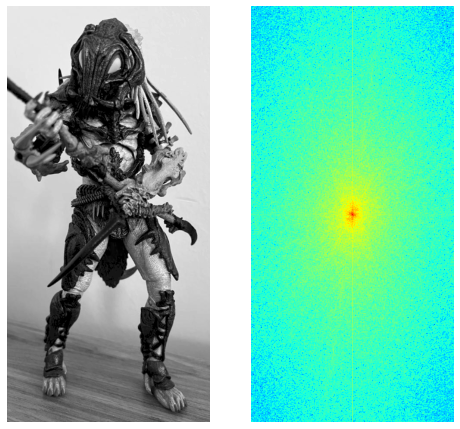

In [ ]:
# Visualizo imagen
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(mod, cmap='jet')

In [ ]:
# Función para crear filtros Gaussianos
def create_gauss_filter(height, width, k_size=25, sigma=5, type='blur'):
  canvas = np.zeros((height, width))
  center_x = int(np.floor(height/2))
  center_y = int(np.floor(width/2))
  canvas[center_x, center_y] = 1
  gauss_filter = cv.GaussianBlur(canvas, (k_size, k_size), sigma)
  gauss_filter_tf = np.fft.fft2(gauss_filter) 
  if type=='boundary':
    gauss_filter_tf = np.fft.fftshift(np.fft.fft2(gauss_filter))
  return gauss_filter, gauss_filter_tf

### Item 1: Ploteo del filtro para varios valores de tamaño de kernel y de sigma

In [ ]:
kernels = [5, 15, 25]
sigmas = [2, 5, 8]

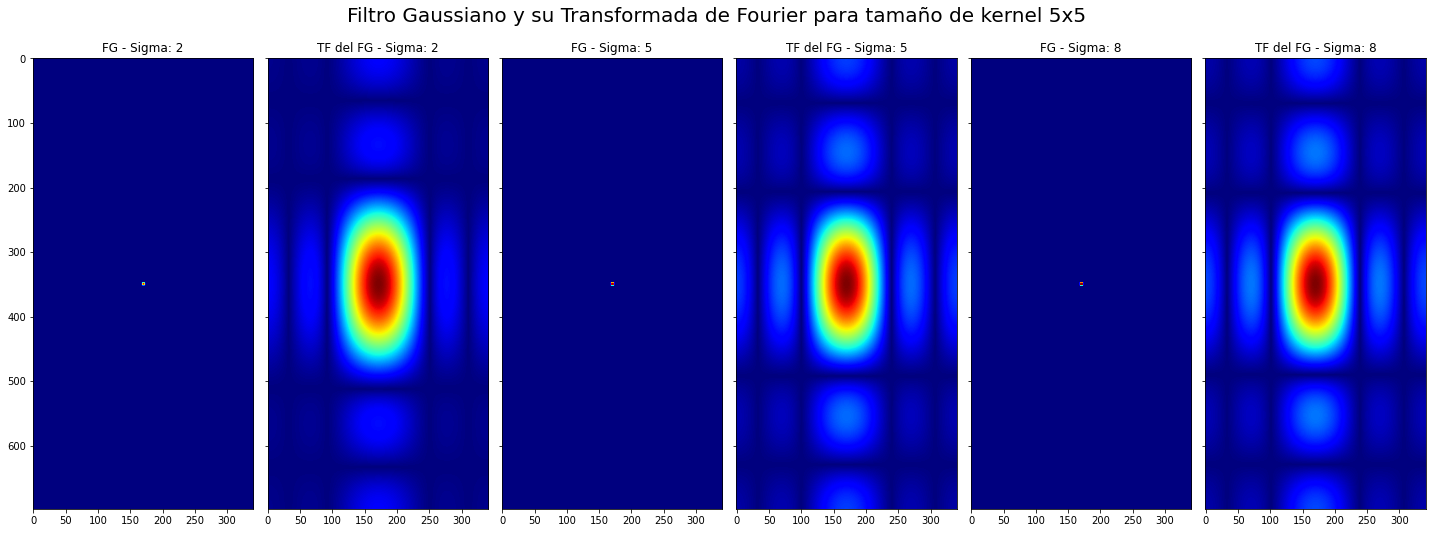

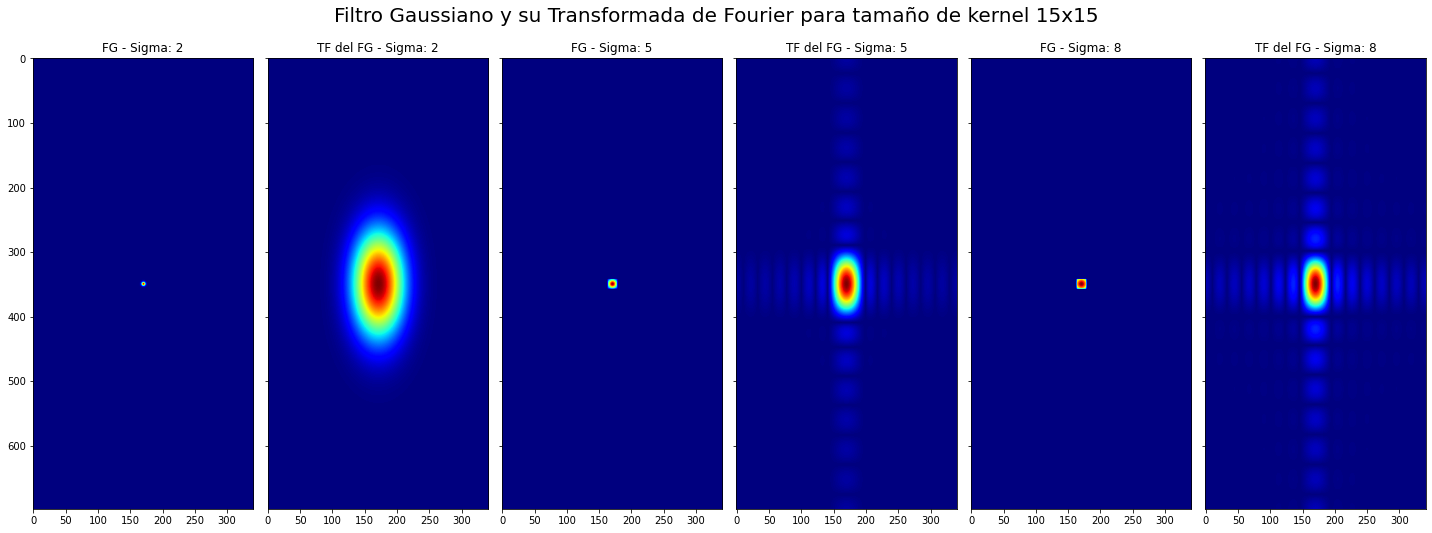

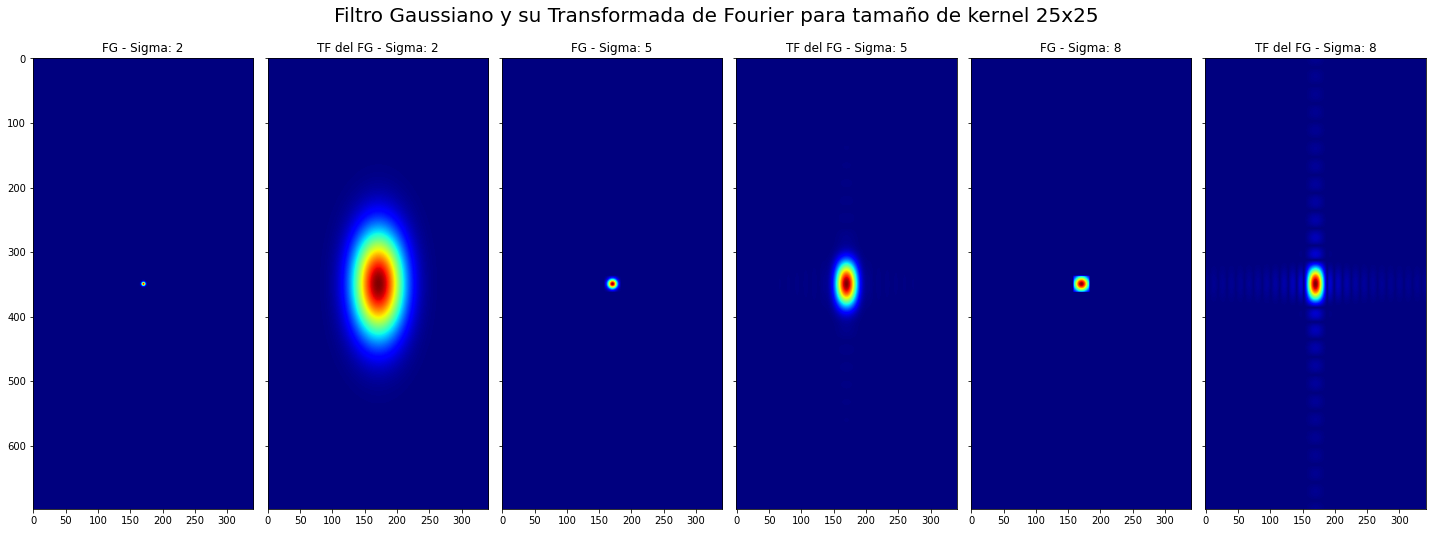

In [ ]:
# Obtengo y visualizo los filtros Gaussianos y su TF para diferentes tamaños de kernel y para diferentes valores de sigma
h, w = img.shape
GF = []
GF_TF = []
for i in range(len(kernels)):
  kernel = kernels[i]
  fig, axs = plt.subplots(1, 2*len(sigmas), sharey=True, figsize=(20,8)) 
  for j in range(len(sigmas)):
    sigma = sigmas[j]
    gauss_filter, gauss_filter_tf = create_gauss_filter(h, w, k_size=kernel, sigma=sigma)
    GF.append(gauss_filter)
    GF_TF.append(gauss_filter_tf)
    axs[j*2].imshow(gauss_filter, cmap='jet')
    axs[j*2].set_title('FG - Sigma: ' + str(sigma))
    axs[j*2+1].imshow(np.abs(np.fft.fftshift(gauss_filter_tf)), cmap='jet')
    axs[j*2+1].set_title('TF del FG - Sigma: ' + str(sigma))

  fig.suptitle('Filtro Gaussiano y su Transformada de Fourier para tamaño de kernel ' + str(kernel)+'x'+str(kernel), fontsize=20) 
  fig.tight_layout()

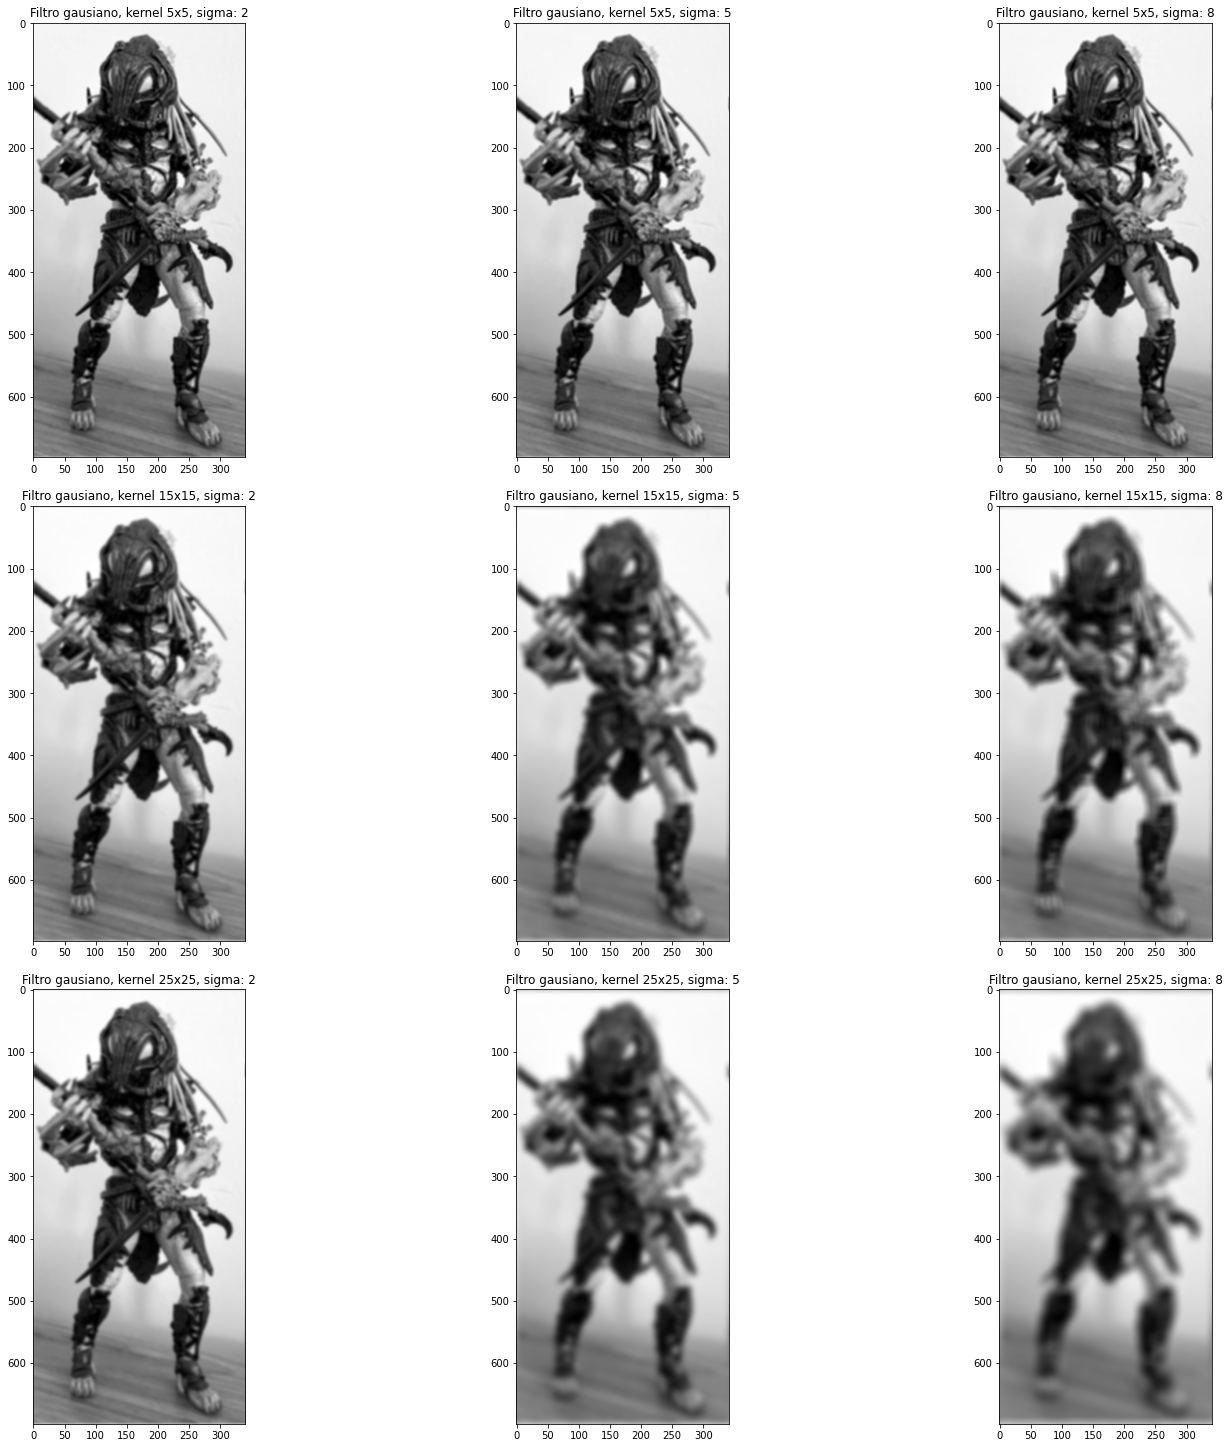

In [ ]:
# Aplico la transformada de Fourir de los filtros Gaussianos generados a la imagen original
fig, axs = plt.subplots(len(sigmas), len(kernels), constrained_layout=True, figsize=(20,20))

cont = 0
img_tf = []
for i in range(len(kernels)):
  for j in range(len(sigmas)):
    img_fft = np.fft.fft2(img)
    filtered = img_fft * GF_TF[cont]
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    img_tf.append(img_gauss)
    axs[i, j].imshow(img_gauss, cmap='gray')
    axs[i, j].set_title('Filtro gausiano, kernel ' +str(kernels[i])+'x'+str(kernels[i]) + ', sigma: ' +str(sigmas[j]))
    cont += 1

### Extra: filtro de Gauss para detectar bordes

En la funcion `create_gauss_filter`, si se devuelve la Transformada de Fourier "shifteada" del filtro, se obtiene un filtro que permite detectar los bordes de la imagen

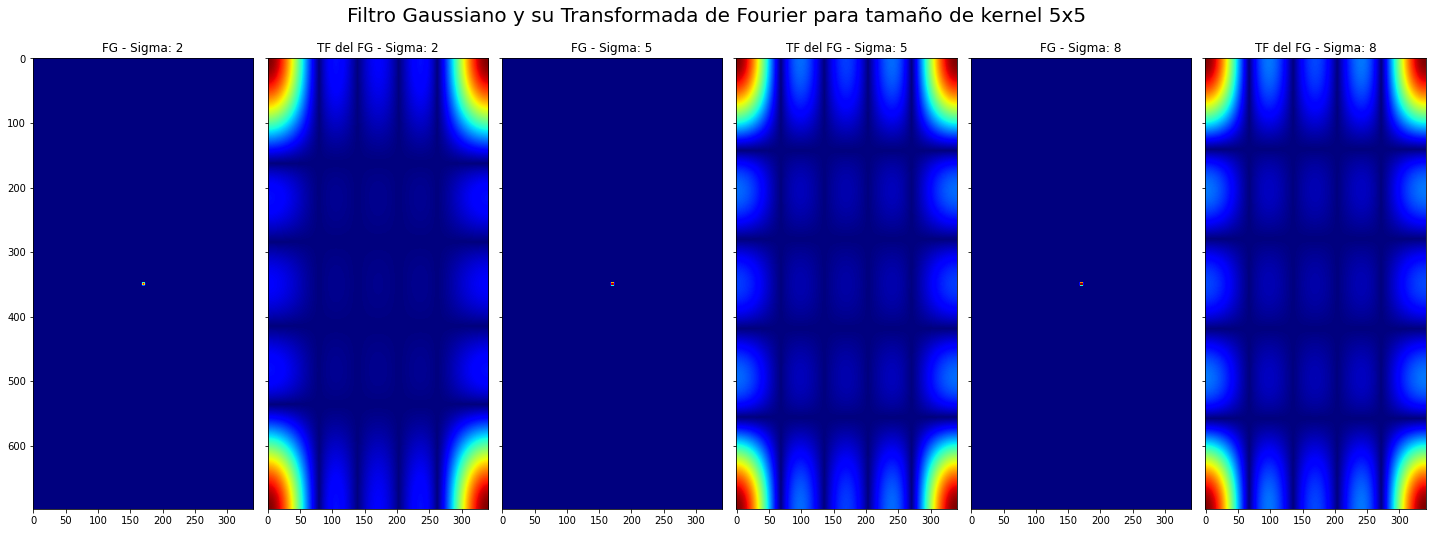

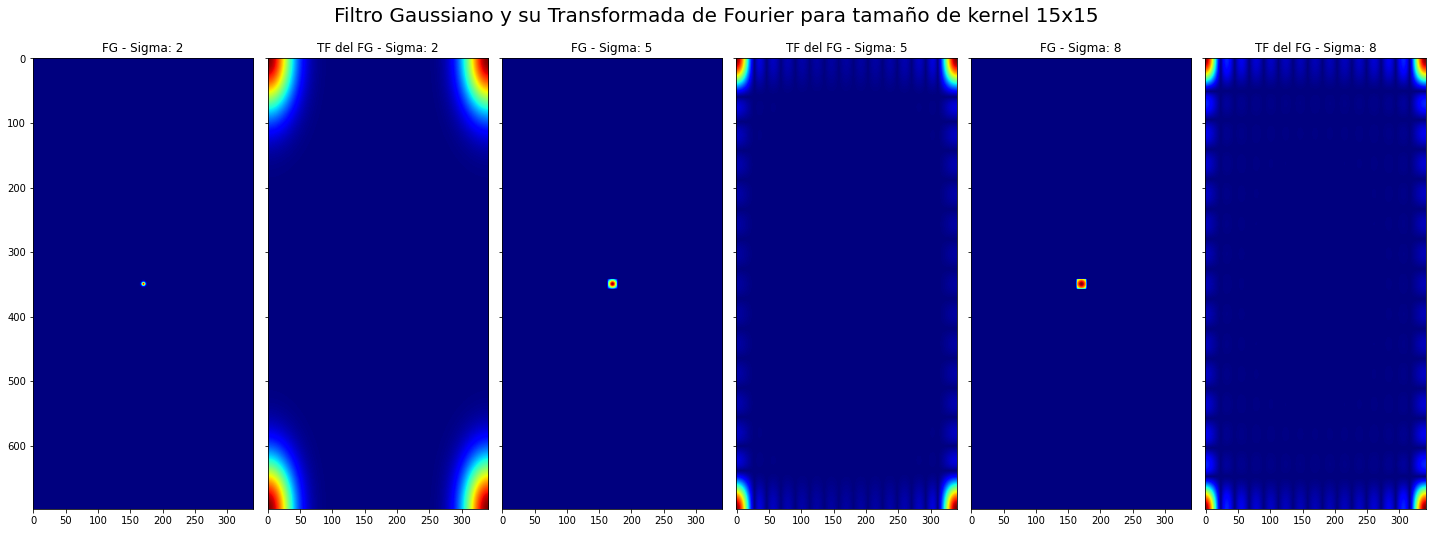

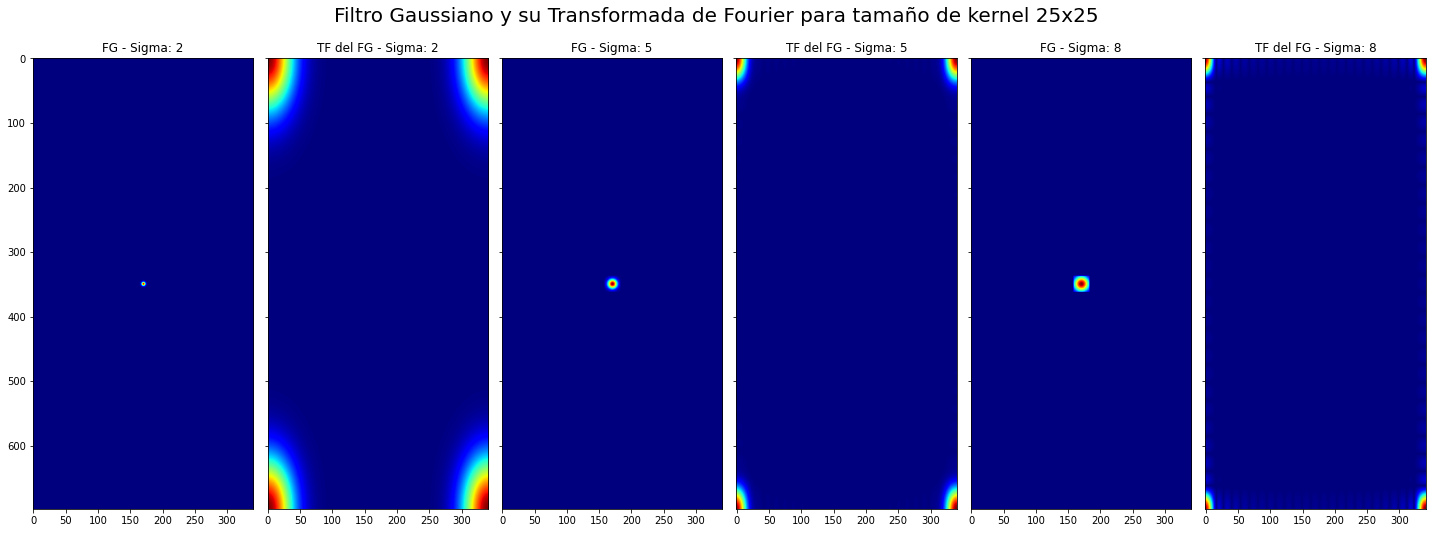

In [ ]:
# Obtengo y visualizo los filtros Gaussianos y su TF para diferentes tamaños de kernel y para diferentes valores de sigma
GF_2 = []
GF_TF_2 = []
for i in range(len(kernels)):
  kernel = kernels[i]
  fig, axs = plt.subplots(1, 2*len(sigmas), sharey=True, figsize=(20,8)) 
  for j in range(len(sigmas)):
    sigma = sigmas[j]
    gauss_filter, gauss_filter_tf = create_gauss_filter(h, w, k_size=kernel, sigma=sigma, type='boundary')
    GF_2.append(gauss_filter)
    GF_TF_2.append(gauss_filter_tf)
    axs[j*2].imshow(gauss_filter, cmap='jet')
    axs[j*2].set_title('FG - Sigma: ' + str(sigma))
    axs[j*2+1].imshow(np.abs(np.fft.fftshift(gauss_filter_tf)), cmap='jet')
    axs[j*2+1].set_title('TF del FG - Sigma: ' + str(sigma))

  fig.suptitle('Filtro Gaussiano y su Transformada de Fourier para tamaño de kernel ' + str(kernel)+'x'+str(kernel), fontsize=20) 
  fig.tight_layout()

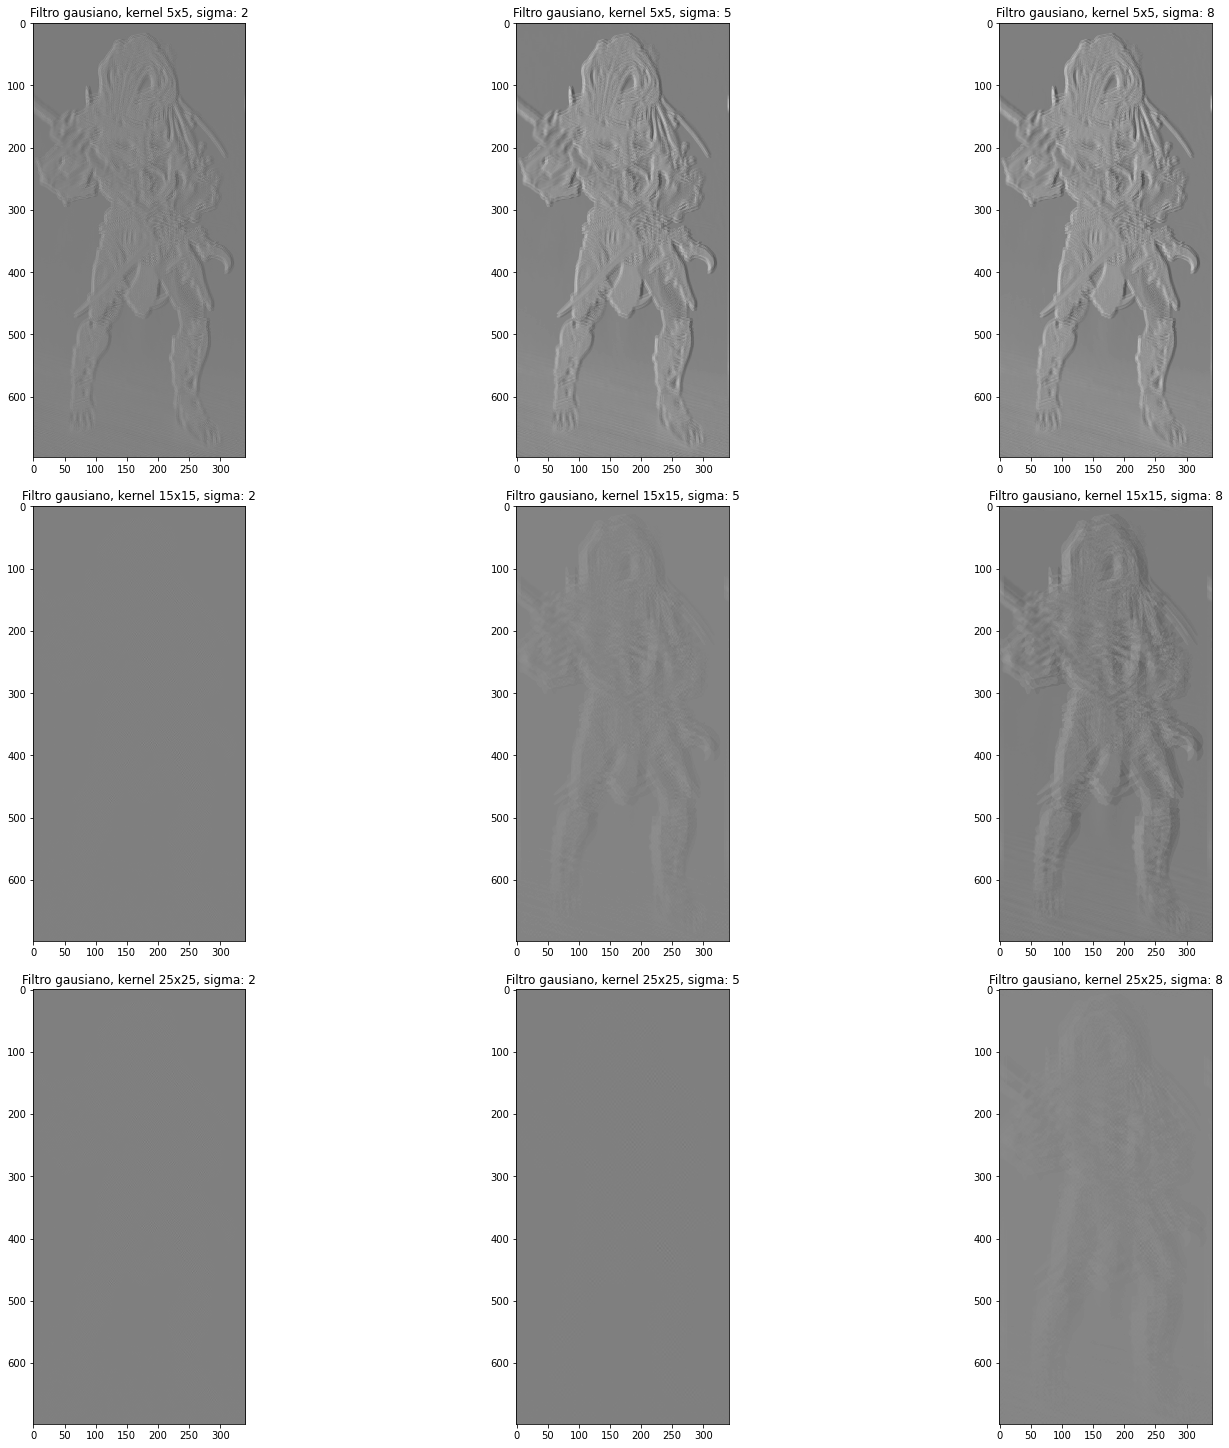

In [ ]:
# Aplico la transformada de Fourir de los filtros Gaussianos generados a la imagen original
fig, axs = plt.subplots(len(sigmas), len(kernels), constrained_layout=True, figsize=(20,20))

cont = 0
for i in range(len(kernels)):
  for j in range(len(sigmas)):
    img_fft = np.fft.fft2(img)
    filtered = img_fft * GF_TF_2[cont]
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    axs[i, j].imshow(img_gauss, cmap='gray')
    axs[i, j].set_title('Filtro gausiano, kernel ' +str(kernels[i])+'x'+str(kernels[i]) + ', sigma: ' +str(sigmas[j]))
    cont += 1

### Item 2: comparación de resultados aplicando filtro de convolución con los mismos tamaños de kernel

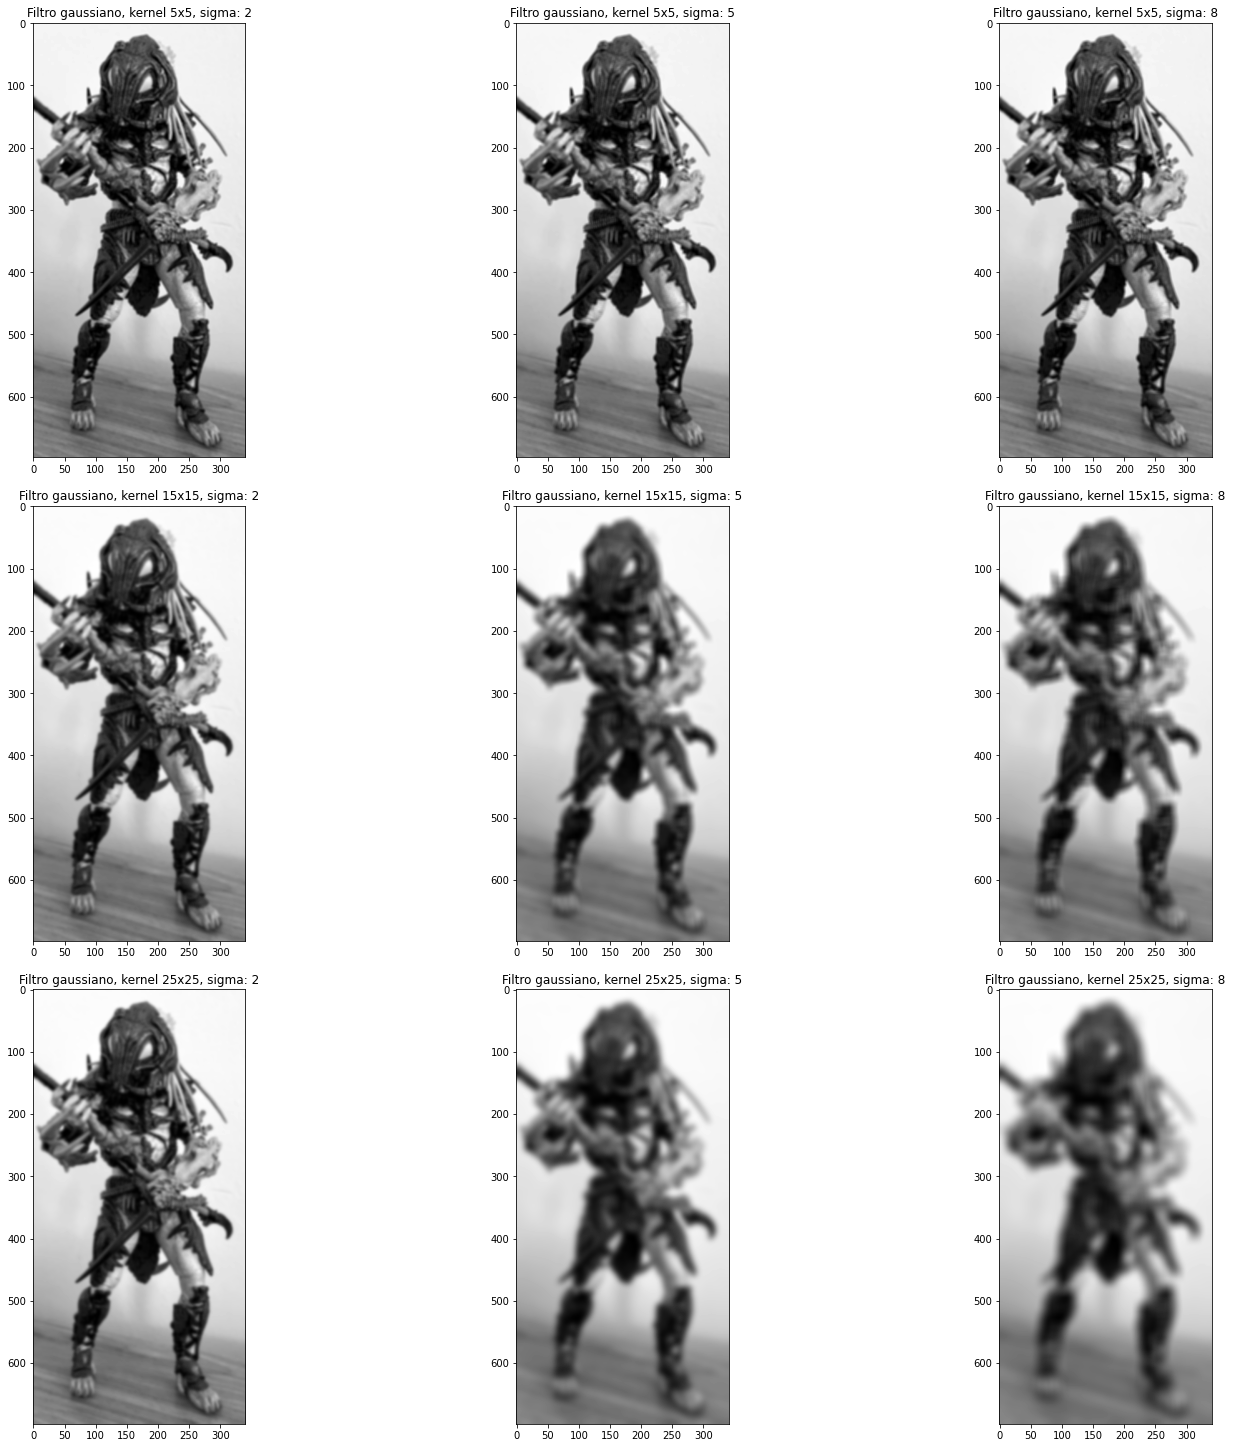

In [ ]:
fig, axs = plt.subplots(len(sigmas), len(kernels), constrained_layout=True, figsize=(20,20))

img_conv = []
cont = 0
for i in range(len(kernels)):
  for j in range(len(sigmas)):
    c = cv.GaussianBlur(img, (kernels[i],kernels[i]), sigmas[j])
    img_conv.append(c)
    axs[i, j].imshow(c, cmap='gray')
    axs[i, j].set_title('Filtro gaussiano, kernel ' +str(kernels[i])+'x'+str(kernels[i]) + ', sigma: ' +str(sigmas[j]))
    cont += 1

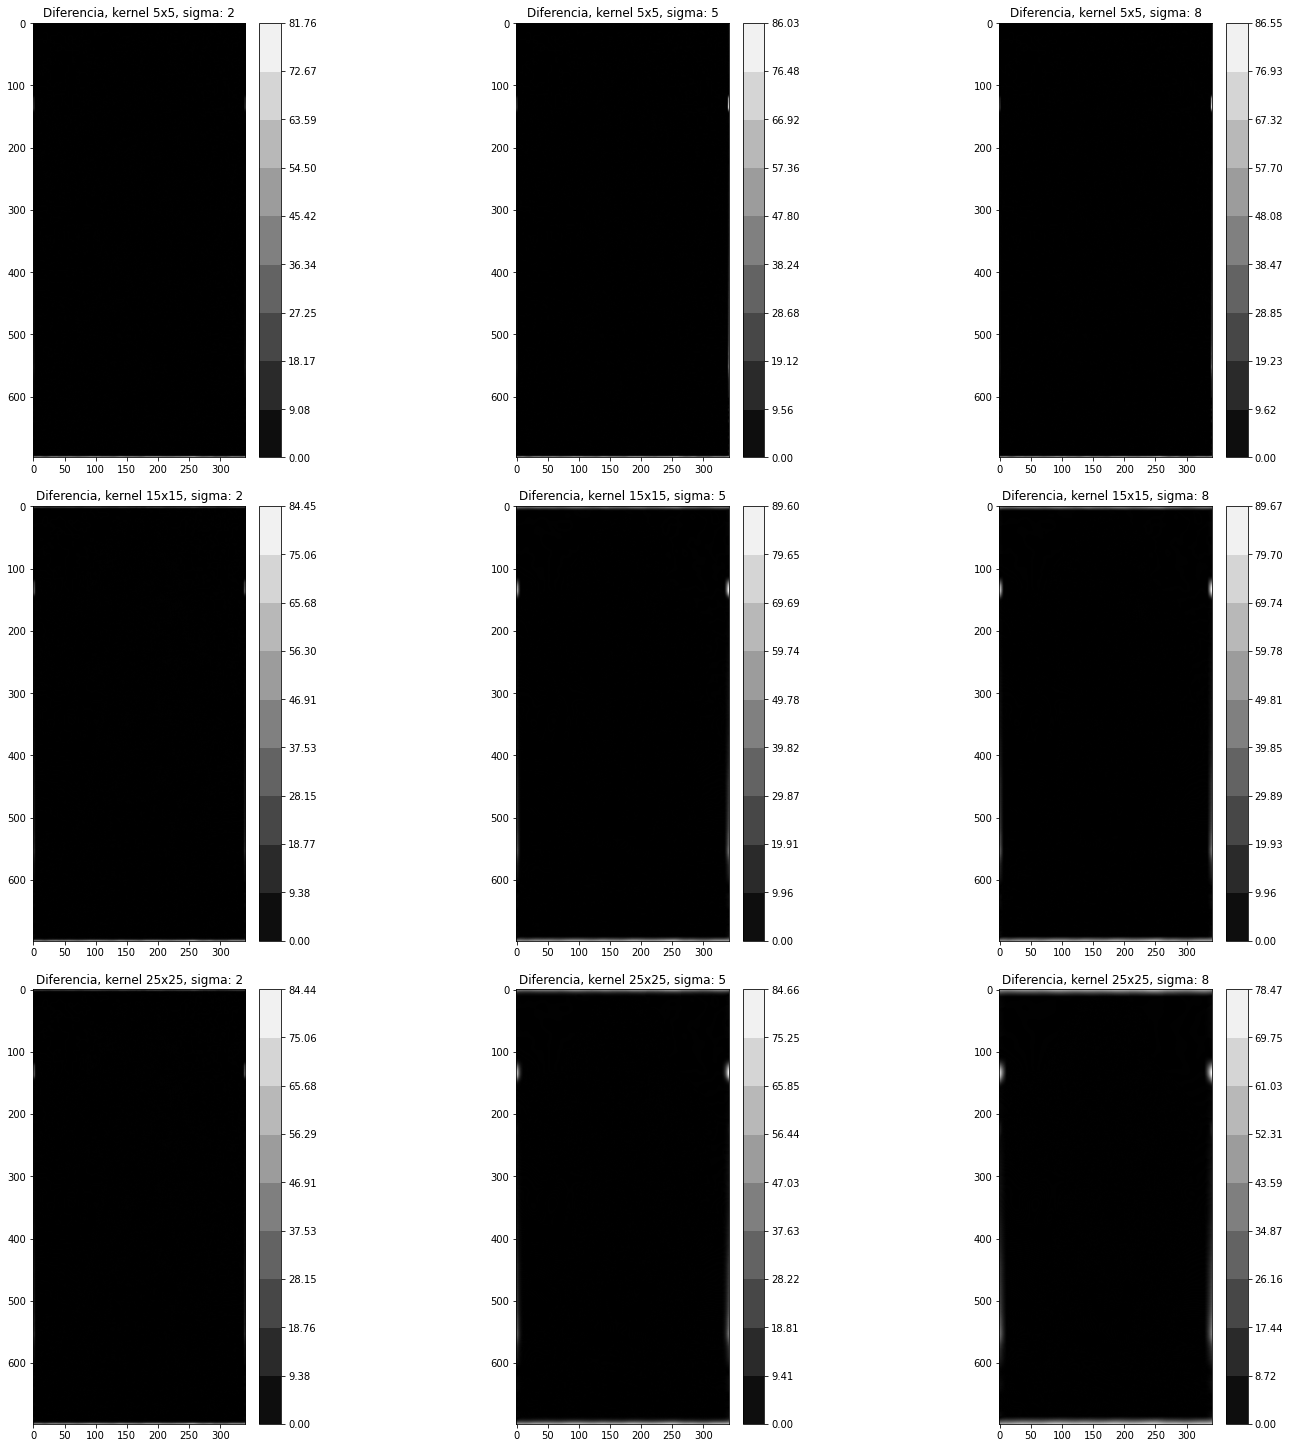

In [ ]:
# Comparación pixel a pixel entre filtrado con la TF y filtrado por convolución
fig, axs = plt.subplots(len(sigmas), len(kernels), constrained_layout=True, figsize=(20,20))

cont = 0
for i in range(len(kernels)):
  for j in range(len(sigmas)):
    diff = abs(img_tf[cont]-img_conv[cont])
    bounds = np.linspace(0, np.max(diff), 10)
    im = axs[i, j].imshow(diff, cmap='gray')
    axs[i, j].set_title('Diferencia, kernel ' +str(kernels[i])+'x'+str(kernels[i]) + ', sigma: ' +str(sigmas[j]))
    fig.colorbar(im, ax=axs[i, j], ticks=bounds, boundaries=bounds)
    cont += 1

### Conclusión

- Aplicar el filtro de Transformada de Fourier pixel a pixel produce prácticamente los mismos resultados que aplicar el filtro de convolución gaussiano con el mismo tamaño de kernel. Esto se puede apreciar mejor en la última imagen donde se ha graficado la diferencia entre las imágenes resultantes para cada uno de los nueve casos considerados. Sólo se aprecian algunas variaciones en los bordes.

- La técnica de Transformada de Fourier permite obtener filtros tanto para desenfocar como para identificar bordes, utilizando el mismo tamaño de kernel y el mismo valor de sigma, sólamente devolviendo la TF "sin shiftear" como "shifteada", respectivamente.

---

## Implementación de algoritmo de gradientes

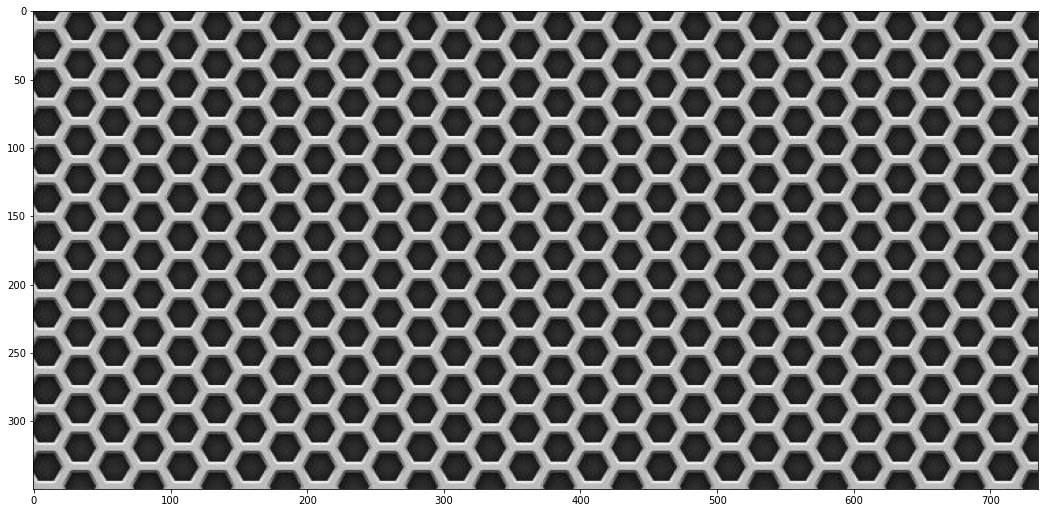

In [ ]:
# Leo la imagen en escala de grises
img2 = cv.imread('metalgrid.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(18,18))
plt.imshow(img2, cmap='gray')
plt.show()

### Item 1: calculo de los gradientes en la imagen (dirección y módulo)

Utilizo parte de la implementación de la notebook `02.Bordes.ipynb` dada en la clase de teoría



In [ ]:
# Suavizado Gaussiano
#====================
blur = cv.GaussianBlur(img2, (5,5), 0)

# Gradientes
#===========

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur, cv.CV_32F, 1, 0, ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur, cv.CV_32F, 0, 1, ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)


### Item 2: muestro imágenes de ángulo y módulo

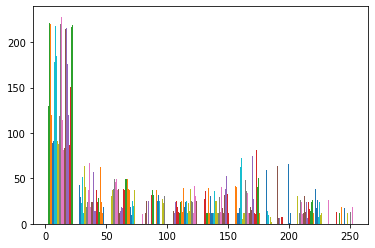

In [ ]:
# Histograma de módulos de gradiente
plt.hist(mag)
plt.show()

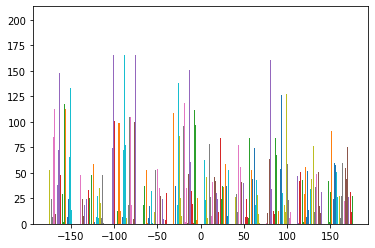

In [ ]:
# Histograma de angulos de gradiente
plt.hist(angle)
plt.show()

### Item 3: Marco con colores las direcciones de gradientes más representativos

In [ ]:
# Encontramos los píxels vecinos (b,c) en la dirección (redondeadea) del gradiente y aplicamos la supresión de no-máximos
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            
        # Supresión de no-máximos
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

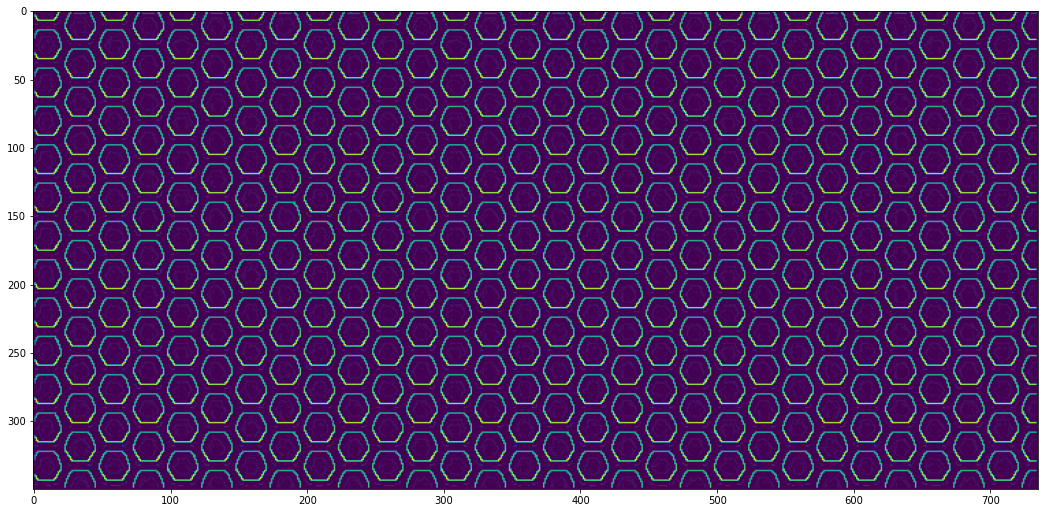

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(Non_max)
plt.show()

In [ ]:
UmbralAlto = 21
UmbralBajo = 15

M, N = Non_max.shape
out = np.zeros((M,N), dtype= np.uint8)

# Si la intensidad de un borde es mayor a 'UmbralAlto' es seguro un umbral, debajo de 'UmbralBajo' seguro no es
strong_i, strong_j = np.where(Non_max >= UmbralAlto)
zeros_i, zeros_j = np.where(Non_max < UmbralBajo)

# Bordes débiles
weak_i, weak_j = np.where((Non_max <= UmbralAlto) & (Non_max >= UmbralBajo))

# Setear el mismo valor a todos los tipos de píxel
out[strong_i, strong_j] = 255
out[zeros_i, zeros_j ] = 0
out[weak_i, weak_j] = 75


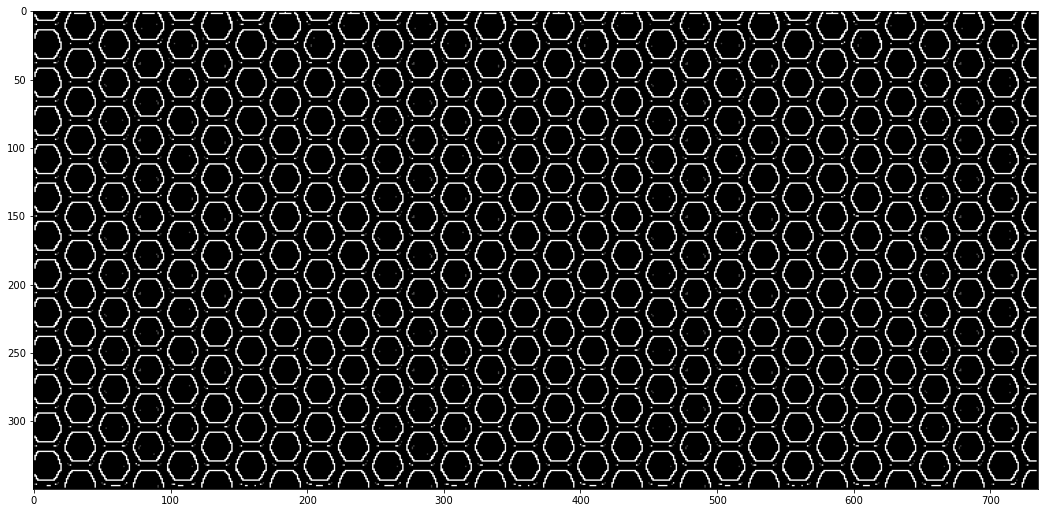

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(out, cmap='gray')
plt.show()